In [138]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
plt.rcParams['figure.figsize'] = 5,5
import warnings
warnings.filterwarnings('ignore')

In [139]:
iris = datasets.load_iris()

In [140]:
# dataset iris terdiri dari
# data, isinya array berupa nilai dari atribut
# target, isinya nilai 1/setosa,0/versicolor,2/virginica
# descr
# feature_names, ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']




In [141]:
X1 = iris.data[0:50,0:2] # Setosa - sepal length&width 
X2 = iris.data[50:100,0:2] #Versicolor
X3 = iris.data[100:150,0:2] #virginica

m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
m3 = np.mean(X3, axis=0)

C1 = np.cov(X1.T)
C2 = np.cov(X2.T)
C3 = np.cov(X3.T)

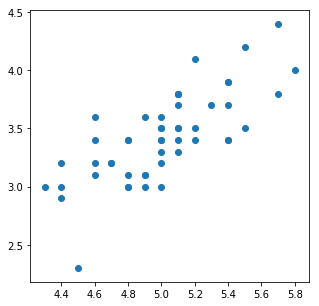

In [142]:
#korelasi antara (sepal length:0 & sepal width:1)
plt.scatter(X1[:,0],X1[:,1])
plt.show()

# LINEAR REGRESSION - 1 variable
### REGRESI UNTUK SETOSA.SEPAL WIDTH menggunakan s.length
### (y = mX + C)

In [143]:
#REGRESI UNTUK SEPAL WIDTH

#------------------------------------------------------------
#MATRIX 1  
#DATA REAL INDEPENDEN/SEPAL LENGTH[0] + MATRIX (1)
c1 = X1 [:,0] #s.length
mones = np.ones(50)
X = np.c_[c1,mones]

#DATA REAL DEPENDENT/SEPAL WIDTH[1]
y = X1[:,1] #s.width

#------------------------------------------------------------
#MATRIX 2/ MC
# mencari nilai B = (XT.X)'.(XT.y)

#matmul untuk perkalian
#(X Trans . X) = r2
# r2 harus kita invers
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)

#(X transpose . y) = r1
r1 = np.matmul(X.T, y)

#bentuk matrix  B = r2inv . r1
b = np.matmul(r2inv, r1)
b

array([ 0.7985283 , -0.56943267])

In [144]:
XX = np.arange(4,6,0.05)
#melakukan prediksi, matrix 1 yg diubah (XX)
#YY = prediksi nilai y terhadap XX
#BENTUK MODEL(YY) HASIL PREDIKSI SEPAL WIDTH
#BU: y = mX + c
#nah yg dipake adl matrix prediksi(XX) matrix kedua(b, nilai m&c)
YY = b[0]*XX + b[1]

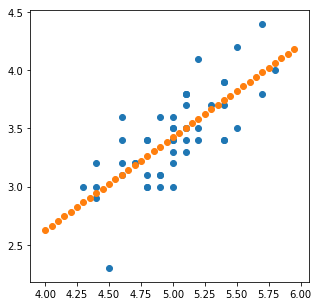

In [145]:
#Visualisasi PREDIKSI & REAL
plt.scatter(X1[:,0],X1[:,1]) #c1,y
plt.scatter(XX,YY)
plt.show()

# POLYNOMIAL REGRESSION PANGKAT 2 - dengan HANYA 1 variable
## matrix 1 adl : var1^(pangkat2) , var1(pangkat1) , 1 (pangkat0)
### REGRESI UNTUK SETOSA.s width menggunakan s.length
### y = aX^ + bX + C

perbedaan hanya terdapat pada matrix1. 

In [146]:
#------------------------------------------------------------
#MATRIX 1
c1 = X1[:,0] #Setosa - sepal length
sqc1 = np.square(c1)
mones = np.ones(50)
X = np.c_[sqc1,c1, mones]

#DATA REAL DEPENDENT/SEPAL WIDTH[1]
y = X1[:,1]

#------------------------------------------------------------
#MATRIX 2 (a,b,c)
r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)

r2inv = np.linalg.inv(r2)

b = np.matmul(r2inv, r1)

#------------------------------------------------------------
#BUAT MATRIX U/ PREDIKSI (XX)
XX = np.arange(4,6, 0.005)
YY = b[0]*XX*XX + b[1]*XX + b[2]

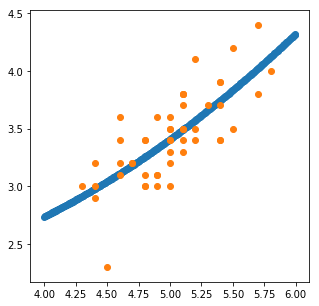

In [147]:
#visualisasi PRED & REAL
y_pred = plt.scatter(XX,YY)
y_real = plt.scatter(c1,y)

# POLYNOMIAL REGRESSION PANGKAT 3 - dengan HANYA 1 variable
## matrix 1 adl : var1***(pangkat3), var1^(pangkat2) , var1(pangkat1) , 1 (pangkat0)
### REGRESI UNTUK SETOSA.s width menggunakan s.length
### y = aXXX + bXX + cX + d

perbedaan hanya terdapat pada matrix1. 

In [166]:
#------------------------------------------------------------
#MATRIX 1
c1 = X1[:,0]
sqc1 = c1*c1
cbc1 = c1*c1*c1
mones = np.ones(50)
X = np.c_[cbc1,sqc1,c1,mones]

#DATA REAL DEPEND/SEPAL WIDTH[1]
#akan digunakan untuk mencari b
y = X1[:,1]
#------------------------------------------------------------
#MATRIX 2 (a,b,c,d) - b = (XT.X)'.(XT.Y)

r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)

b = np.matmul(r2inv, r1)
#------------------------------------------------------------
#BUAT MATRIX U/ PREDIKSI (XX) Y = aXX
XX = np.arange(4,6,0.05)
YY = b[0]*XX*XX*XX + b[1]*XX*XX + b[2]*XX + b[3]

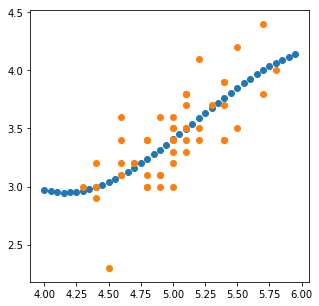

In [167]:
#Visualisasi PREDIKSI + REAL
y_pred = plt.scatter(XX,YY)
y_real = plt.scatter(X1[:, 0], X1[:, 1])

# LINEAR REGRESSION - 2 VAR ()
    data : sepal length,petal length
    yg dicari: sepal width
    
Bedanya di matrix 1 DAN xx (matrix untuk prediksi, karna dg 2 var/lebih)

In [175]:
#50 teratas - sentosa
X1 = iris.data[:50, 0:3] #sepal length, sepal width, petal length
X1 = iris.data[0:50, [0,2,1]] #sepal length, petal length, sepal width

#------------------------------------------------------------
#MATRIX 1
c1 = X1[:,0] #sepal length
c2 = X1[:,1] #petal length
mones = np.ones(50)
X = np.c_[c1,c2,mones]

#DATA REAL DEPEND/SEPAL WIDTH[2]
#akan digunakan untuk mencari b
y = X1[:,2]
#------------------------------------------------------------
#MATRIX 2 (a,b,c,d) - b = (XT.X)'.(XT.Y)
r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv,r1)
b

array([ 0.80493004, -0.04863374, -0.53037726])

#### matrix untuk prediksi dg >1 var - harus di GRID

In [176]:
XX1 = np.arange(4,6,0.05)
XX2 = np.arange(4,6,0.05)
GX1, GX2 = np.meshgrid(XX1,XX2)

In [178]:
GX1

array([[4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95],
       [4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95],
       [4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95],
       ...,
       [4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95],
       [4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95],
       [4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95]])

In [179]:
GX2

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [4.05, 4.05, 4.05, ..., 4.05, 4.05, 4.05],
       [4.1 , 4.1 , 4.1 , ..., 4.1 , 4.1 , 4.1 ],
       ...,
       [5.85, 5.85, 5.85, ..., 5.85, 5.85, 5.85],
       [5.9 , 5.9 , 5.9 , ..., 5.9 , 5.9 , 5.9 ],
       [5.95, 5.95, 5.95, ..., 5.95, 5.95, 5.95]])

In [180]:
GX1.ravel()

array([4.  , 4.05, 4.1 , ..., 5.85, 5.9 , 5.95])

In [181]:
YY = b[0]*GX1.ravel() + b[1]*GX2.ravel() +b[2]

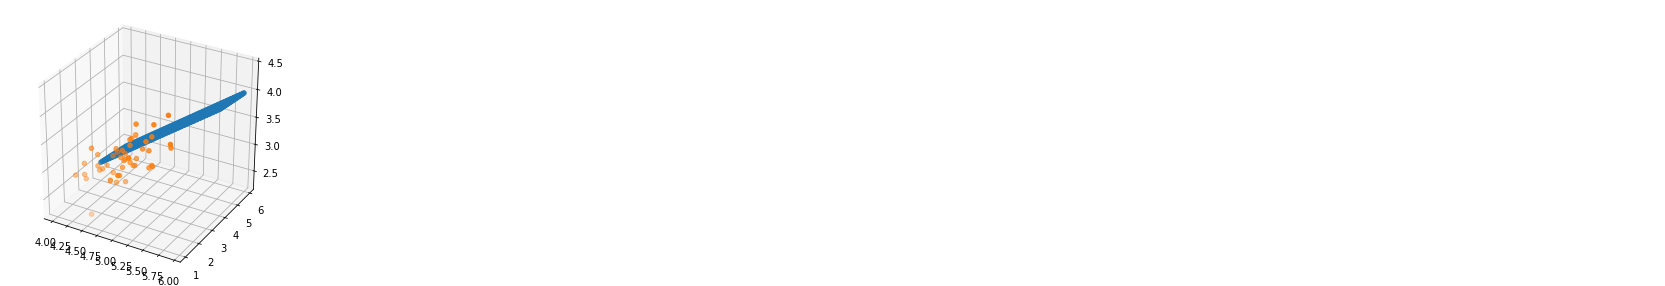

In [182]:
#VISUALISASI PREDIKSI 2 VAR 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(GX1.ravel(), GX2.ravel(), YY)
ax.scatter(X1[:,0],X1[:,1],X1[:,2])
plt.show()

# POLYNOMIAL - 2 var
    data : sepal length,petal length
    yg dicari: sepal width

# aX1X1 + bX2X2 + cX1X2 + dX1 + eX2 + f

In [193]:
#------------------------------------------------------------
#MATRIX 1
c1 = X1[:,0]
c2 = X1[:,1]
sqc1 = c1*c1
sqc2 = c2*c2
c1c2 = c1*c2
mones = np.ones(50)
X = np.c_[sqc1,sqc2,c1c2,c1,c2,mones]
#DATA REAL DEPEND/SEPAL WIDTH[1]
#akan digunakan untuk mencari b
y = X1[:,2]
#------------------------------------------------------------
#MATRIX 2 (a,b,c,d) - b = (XT.X)'.(XT.Y)
r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
#------------------------------------------------------------
#PREDIKSI - menggunakan GX1 & GX2 sebelumnya
# matrix untuk prediksi dg >1 var - harus di GRID 

XX1 = np.arange(0,10,0.05)
XX2 = np.arange(0,10,0.05)
GX1, GX2 = np.meshgrid(XX1,XX2)

YY =  b[0]*GX1.ravel()*GX1.ravel() + b[1]*GX2.ravel()*GX2.ravel() + \
b[2]*GX1.ravel()*GX2.ravel() + b[3]*GX1.ravel() + b[4]*GX2.ravel() + b[5]

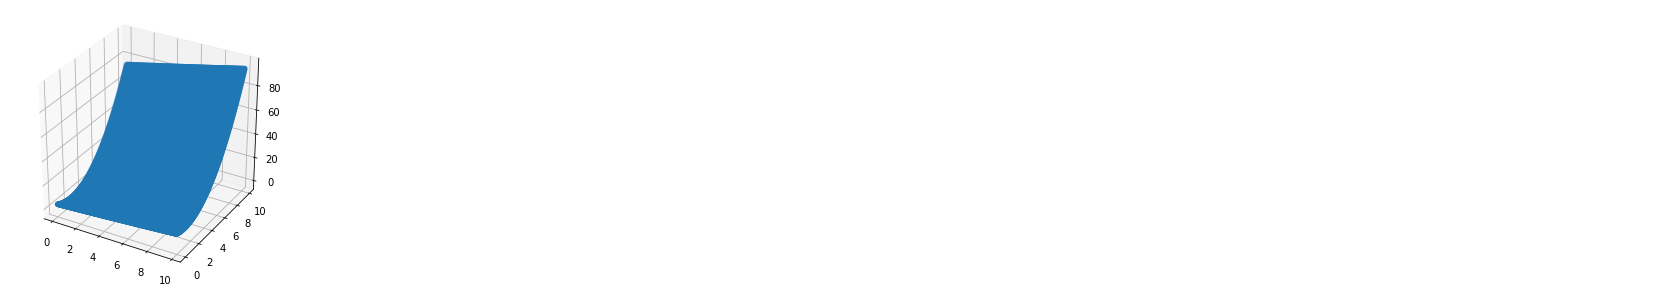

In [194]:
#Visualisasi
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(GX1.ravel(), GX2.ravel(), YY) #fake-pred
ax.scatter(X1[:,0],X1[:,1],X1[:,2]) #real
plt.show()

# LINEAR REGRESSION - library 

In [195]:
c1 = X1[:,0]
c2 = X1[:,1]
X = np.c_[c1,c2]

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
#CREAN AN OBJECT
linreg = LinearRegression()
y = X1[:,2] #data target

#proses learning dr data
linreg.fit(X,y) 

linreg.coef_

array([ 0.80493004, -0.04863374])

In [198]:
#X = np.c_[c1,c2]
#UNTUK CENTERISASI -----------------------------------------------
m1 = np.mean(X1, axis=0) 
m1

array([5.006, 1.462, 3.428])

In [199]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [200]:
c1 = c1 - m1[0]
c1 = c1 - m1[1]
c1 = X1[:,0] - m1[0]
c2 = X2[:,1] - m1[1]
X = np.c_[c1,c2]
linreg.fit(X,y)
linreg.coef_

array([ 0.79129275, -0.10463539])

# Ridge regression
Digunakan untuk regularisasi, meminimalkan square error dengan menambahkan nilai penalty terhadap alpha.
linier ~ argmin (SE + alpha(c1 kuadrat + c2 kuadrat + c3 kuadrat))

In [209]:
from sklearn.linear_model import Ridge
ridreg = Ridge(alpha = 1.0)
ridreg.fit(X,y)
ridreg.coef_

array([0.68587229])

In [208]:
ridreg = Ridge(alpha = 2.0)
ridreg.fit(X,y)
ridreg.coef_

array([0.60107317])

In [210]:
ridreg = Ridge(alpha = 3.0)
ridreg.fit(X,y)
ridreg.coef_

array([0.53493541])

In [211]:
ridreg = Ridge(alpha = 0.4)
ridreg.fit(X,y)
ridreg.coef_

array([0.74929873])

In [212]:
ridreg = Ridge(alpha = 20.0)
ridreg.fit(X,y)
ridreg.coef_

array([0.18635245])

In [213]:
ridreg = Ridge(alpha = 0.0)
ridreg.fit(X,y)
ridreg.coef_

array([0.7985283])

In [214]:
XX = np.arange(0,10,0.05)
linreg.fit(X,y)
ridreg.fit(X,y)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

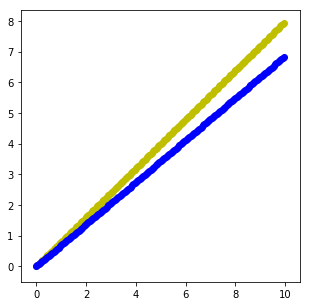

In [204]:
c1 = X1[:,0]
y = X1[:,2]
c1 = X1[:,0] - m1[0]
y = X1[:,2] - m1[2]
X = np.c_[c1]

linreg.fit(X,y)
ridreg.fit(X,y)

XX = np.arange(0,10, 0.05)
XX_ = np.c_[XX]

YY = linreg.predict(XX_)
YY2 = ridreg.predict(XX_)

plt.scatter(XX, YY, c='y')
plt.scatter(XX, YY2, c = 'b')
plt.show()

# Category dengan fungsi logistic

In [215]:
iris.target[45:55]
from sklearn.linear_model import LogisticRegression
X1 = iris.data[0:100, 0:2]
m1 = np.mean(X1, axis=0)
m1

array([5.471, 3.099])

In [216]:
c1 = X1[:,0] - m1[0]
c2 = X1[:,1] - m1[1]
y = iris.target[0:100]
X = np.c_[c1,c2]

In [217]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [218]:
logreg.predict([[5.0, 0.2]])

array([1])

In [219]:
logreg.predict([[3.0, 7.0]])

array([0])

In [220]:
XX = np.arange(-2.5,2.5, 0.05)
YY = np.arange(-2.5,2.5, 0.05)

GX, GY = np.meshgrid(XX, YY)

input = np.c_[GX.ravel(), GY.ravel()]
output = logreg.predict(input)

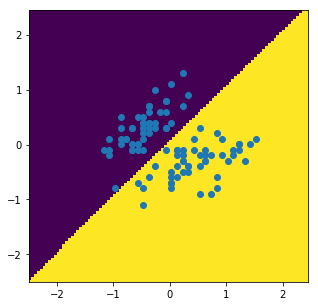

In [221]:
plt.pcolormesh(GX, GY, output.reshape(GX.shape))
plt.scatter(c1,c2)
plt.show()